# Datasets: Downloading Data from Google Trends

### 28th May 2014

### Neil Lawrence

This data set collection was inspired by a [ipython notebook](https://github.com/sahuguet/notebooks/blob/master/GoogleTrends%20meet%20Notebook.ipynb) from [sahuguet](https://github.com/sahuguet) which made queries to google trends and downloaded the results. We've modified the download to cache the results of a query: making multiple calls to the google API results in a block due to terms of service violations, cacheing the data locally prevents this happening.

In [1]:
import pods
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# calling without arguments uses the default query terms
data = pods.datasets.google_trends(['big data', 'internet of things']) 

Accessing Google trends to acquire the data. Note that repeated accesses will result in a block due to a google terms of service violation. Failure at this point may be due to such blocks.
Query terms:  big data, internet of things
Fetching query:


HTTPError: HTTP Error 404: Not Found

The default query terms are 'big data', 'data science' and 'machine learning'. The dictionary returned from the call contains the standard 'X' and 'y' keys that are ready to be used in the GPy toolkit as inputs to the Gaussian process. In this case the 'X' variables are the time (first column) and an index representing the query.


In [5]:
print(data['X'][284, :])

[7.35234e+05 1.00000e+00]


So the 284th element of X contains is the 34th time point of the query term 2, which in this case is the 34th time point of the 'machine learning' time series. The value of the time series at that point is given by the corresponding row of `Y`

In [6]:
print(data['Y'][284, :])

[14.]


The dictionary also contains a pandas data frame of the trend data, which is in line with what [sahuguet](https://github.com/sahuguet) originally returned.

In [7]:
data['data frame'].describe()

,big data,internet of things
count,164.000000,164.000000
mean,33.219512,8.384146
std,36.073383,9.751136
min,3.000000,0.000000
25%,5.000000,2.000000
50%,7.000000,3.000000
75%,75.250000,15.250000
max,100.000000,33.000000


And we can plot the trends data to see what the effect is.

In [8]:
data['data frame'].set_index('Date', inplace=True)


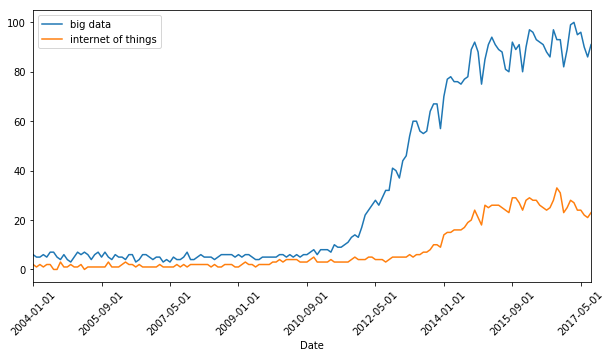

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
data['data frame'].plot(ax=ax)
_ = ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
fig.savefig('/Users/neil/lawrennd/talks/slides/diagrams/bd-iot-google-trends.svg')

### Dogs, Cats and Rabbits

Another data set we might consider downloading from google trends is different pets. Below we consider cats, dogs and rabbits.

Reading cached data for google trends. To refresh the cache set 'refresh_data=True' when calling this function.
Query terms:  cat, dog, rabbit


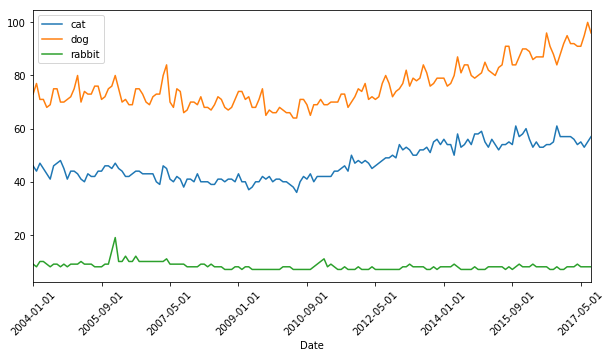

In [11]:
data = pods.datasets.google_trends(['cat', 'dog', 'rabbit'], refresh_data=True)
data['data frame'].set_index('Date', inplace=True)
fig, ax = plt.subplots(figsize=(10,5))
data['data frame'].plot(ax=ax)
_ = ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

Here we've plotted the data in the same manner as [sahuguet](https://github.com/sahuguet) suggested in his original notebook, using the plotting facility of `pandas`.

### Games Consoles

Finally we can try and compare different games console popularity.

In [12]:
data = pods.datasets.google_trends(['xbox one', 'wii u', 'ps4'])

Reading cached data for google trends. To refresh the cache set 'refresh_data=True' when calling this function.
Query terms:  ps4, wii u, xbox one


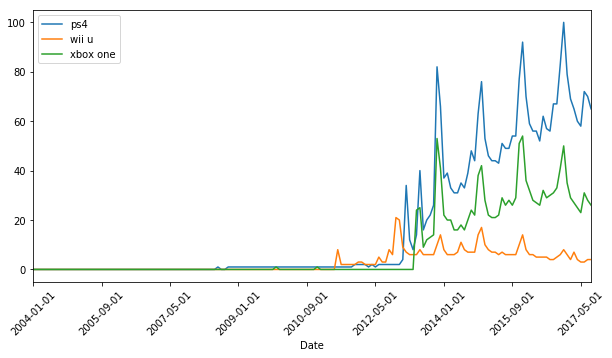

In [13]:
data['data frame'].set_index('Date', inplace=True)
fig, ax = plt.subplots(figsize=(10,5))
data['data frame'].plot(ax=ax)
_ = ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)